In [154]:
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np

# Đường dẫn đến thư mục chứa ảnh ban đầu
input_root_folder = "/Users/admin/Downloads/Lưu trữ 2/love_stage"

# Đường dẫn đến thư mục để lưu ảnh mới được tạo ra
output_root_folder = "/Users/admin/Downloads/Lưu trữ 2/love_stage_augmented"

# Tạo thư mục mới nếu nó chưa tồn tại
if not os.path.exists(output_root_folder):
    os.makedirs(output_root_folder)

# Số lần tạo ảnh mới (gấp đôi số ảnh hiện tại)
num_augmented_images = 15

# Đối tượng ImageDataGenerator để thực hiện augmentation
datagen = ImageDataGenerator(
    rotation_range=20, #xoay 20'
    width_shift_range=0.2, #dịch ngang
    height_shift_range=0.2, # dịch dòng
    zoom_range=0.1,  #phóng to
    horizontal_flip=True,  #lật ảnh
)

# Lặp qua từng thư mục (label)
for label in ["Thất tình", "Đang yêu", "Tương tư"]:
    input_label_folder = os.path.join(input_root_folder, label)
    output_label_folder = os.path.join(output_root_folder, label)

    # Tạo thư mục mới cho label nếu nó chưa tồn tại
    if not os.path.exists(output_label_folder):
        os.makedirs(output_label_folder)

    # Lặp qua từng ảnh trong thư mục hiện tại
    for filename in os.listdir(input_label_folder):
        if filename.lower().endswith((".jpg", ".png",".jpeg")):
            input_image_path = os.path.join(input_label_folder, filename)
            img = image.load_img(input_image_path, target_size=(64, 64))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)

            # Tạo ảnh mới bằng cách áp dụng augmentation
            i = 0
            for batch in datagen.flow(img_array, batch_size=1, save_to_dir=output_label_folder, save_prefix=filename.split('.')[0], save_format='jpg'):
                i += 1
                if i >= num_augmented_images:
                    break

In [162]:
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Rescaling, RandomFlip, RandomRotation, RandomZoom, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

img_width = 64
img_height = 64
batch_size = 18
epochs = 100

data_dir = '/Users/admin/Downloads/Lưu trữ 2/love_stage_augmented'
train_ds, val_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

# tự động tối ưu hóa dữ liệu
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#bắt đầu 16 bộ lọc, 3 là ma trận 3x3
model = Sequential([
    Rescaling(1./255),
    #trích xuất dữ liệu đầu vào
    Conv2D(16, 3, padding="same", activation='relu'), # dữ nguyên đầu ra lớp tích chập đầu ra bằng đầu vào
    #giam kích thước không gian dữ liệu
    MaxPooling2D(padding="same"),
    Conv2D(32, 3, padding="same", activation='relu'),
    MaxPooling2D(padding="same"),
    Conv2D(64, 3, padding="same", activation='relu'),
    MaxPooling2D(padding="same"),
    Conv2D(128, 3, padding="same", activation='relu'),
    MaxPooling2D(padding="same"),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(class_names), activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_ds, 
    validation_data=val_ds,
    epochs=epochs
)

Found 27135 files belonging to 3 classes.
Using 21708 files for training.
Using 5427 files for validation.
['Thất tình', 'Tương tư', 'Đang yêu']
Epoch 1/100
1206/1206 [==============================] - 21s 16ms/step - loss: 0.9471 - accuracy: 0.5445 - val_loss: 0.9033 - val_accuracy: 0.5745
Epoch 2/100
1206/1206 [==============================] - 19s 16ms/step - loss: 0.8033 - accuracy: 0.6430 - val_loss: 0.6800 - val_accuracy: 0.7070
Epoch 3/100
1206/1206 [==============================] - 19s 16ms/step - loss: 0.6138 - accuracy: 0.7390 - val_loss: 0.4699 - val_accuracy: 0.8097
Epoch 4/100
1206/1206 [==============================] - 19s 16ms/step - loss: 0.4586 - accuracy: 0.8151 - val_loss: 0.3787 - val_accuracy: 0.8563
Epoch 5/100
1206/1206 [==============================] - 19s 16ms/step - loss: 0.3462 - accuracy: 0.8641 - val_loss: 0.2932 - val_accuracy: 0.8913
Epoch 6/100
1206/1206 [==============================] - 19s 16ms/step - loss: 0.2661 - accuracy: 0.8972 - val_loss: 0.2

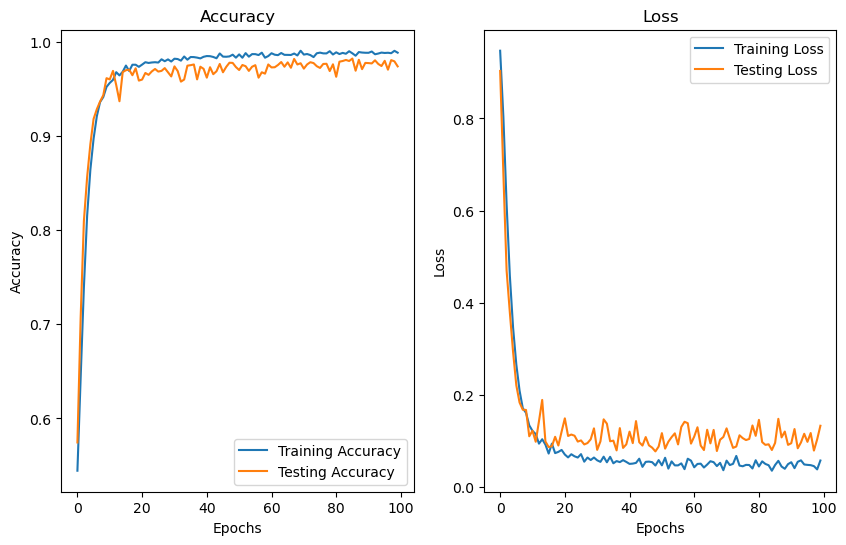

Max Testing Accuracy: 98.23%
Average Testing Accuracy: 95.99%
Final Testing Accuracy: 97.40%


In [167]:
# Lấy giá trị accuracy và loss từ biến "history"
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

# Biểu đồ Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Testing Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Biểu đồ Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

max_test_accuracy = max(test_accuracy)
print(f"Max Testing Accuracy: {max_test_accuracy * 100:.2f}%")
# Tính giá trị trung bình của test_accuracy
average_test_accuracy = np.mean(test_accuracy)
# In ra giá trị trung bình
print(f"Average Testing Accuracy: {average_test_accuracy * 100:.2f}%")
final_test_accuracy = test_accuracy[-1]
print(f"Final Testing Accuracy: {final_test_accuracy * 100:.2f}%")


1/1 [==============================] - 0s 17ms/step


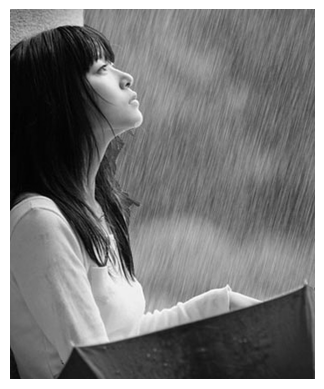

Ảnh này thuộc về nhóm Thất tình với độ chắc chắn là 100.00%.


In [190]:
img_path = '/Users/thanhhung/Downloads/test.jpg'
imgShow = keras.utils.load_img(img_path)
img = keras.utils.load_img(img_path, target_size=(img_height, img_width))
img_array = keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

prediction = model.predict(img_array)
plt.imshow(imgShow)
plt.axis('off')  # Tắt trục
plt.show()

print(
    "Ảnh này thuộc về nhóm \033[1m{}\033[0m với độ chắc chắn là \033[1m{:.2f}%\033[0m."
    .format(class_names[np.argmax(prediction)], 100 * np.max(prediction))
)
